# Runge Kutta

In [1]:
import numpy as np

def rk4_step(y0, x0, f, h, f_args = {}):
    ''' Simple python implementation for one RK4 step. 
        Inputs:
            y_0    - M x 1 numpy array specifying all variables of the ODE at the current time step
            x_0    - current time step
            f      - function that calculates the derivates of all variables of the ODE
            h      - time step size
            f_args - Dictionary of additional arguments to be passed to the function f
        Output:
            yp1 - M x 1 numpy array of variables at time step x0 + h
            xp1 - time step x0+h
    '''
    k1 = h * f(y0, x0, **f_args)
    k2 = h * f(y0 + k1/2., x0 + h/2., **f_args)
    k3 = h * f(y0 + k2/2., x0 + h/2., **f_args)
    k4 = h * f(y0 + k3, x0 + h, **f_args)
    
    xp1 = x0 + h # xstep
    yp1 = y0 + 1./6.*(k1 + 2.*k2 + 2.*k3 + k4) # ystep
    
    return(yp1,xp1)

def rk4(y0, x0, f, h, n, f_args = {}):
    ''' Simple implementation of RK4
        Inputs:
            y_0    - M x 1 numpy array specifying all variables of the ODE at the current time step
            x_0    - current time step
            f      - function that calculates the derivates of all variables of the ODE
            h      - time step size
            n      - number of steps
            f_args - Dictionary of additional arguments to be passed to the function f
        Output:
            yn - N+1 x M numpy array with the results of the integration for every time step (includes y0)
            xn - N+1 x 1 numpy array with the time step value (includes start x0)
    '''
    yn = np.zeros((n+1, y0.shape[0])) # y points until n steps
    xn = np.zeros(n+1) # x points until n steps
    yn[0,:] = y0
    xn[0] = x0
    
    for n in np.arange(1,n+1,1):
        yn[n,:], xn[n] = rk4_step(y0 = yn[n-1,:], x0 = xn[n-1], f = f, h = h, f_args = f_args)
        
    return(yn, xn)

# Be advised that the integration can take a while for large values of n (e.g >=10^5).


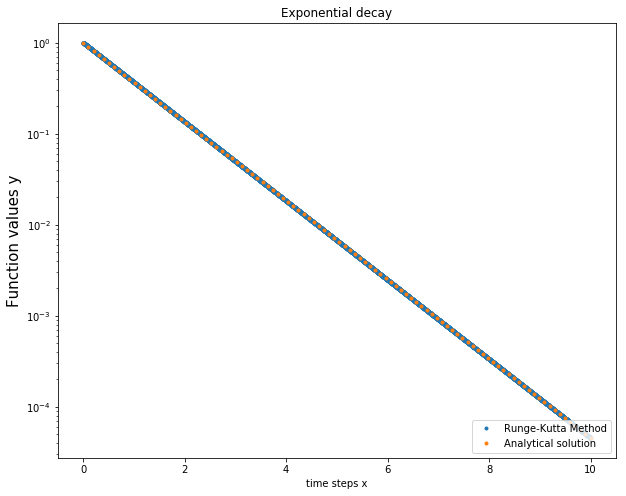

In [36]:
import matplotlib.pyplot as plt


#define exponential decay as dy(x)/d(x) = f(y(x),x) = -r*x
r=1
def f(y,x):
    return -r*y

#numerical evaluation of f(y(x),x)=dy(x)/dx

y0 = np.array([1.]) # initial y-value y(x0) = y0 = y(x0=0)=1
x0 = 0. #initial time step
h = 0.001 #time step
n = 10**4 #total time steps

#semi logarithmic plot
    
plt.figure(figsize=[10,8])        
plt.semilogy(rk4(y0, x0, f, h, n)[1],rk4(y0, x0, f, h, n)[0],'.',label='Runge-Kutta Method')
plt.xlabel('time steps x')
plt.ylabel('Function values y',fontsize=15)
plt.title('Exponential decay')


#analytical solution for given initial conditions

Y0 = 1
X0 = 0

def y(x,Y0,X0):
    return Y0 * np.exp(-r*(x-X0))

x = np.linspace(0,10,100)
plt.semilogy(x,y(x,Y0,X0),'.',label='Analytical solution')
plt.legend(loc='lower right')
plt.show()

# 3 Body problem

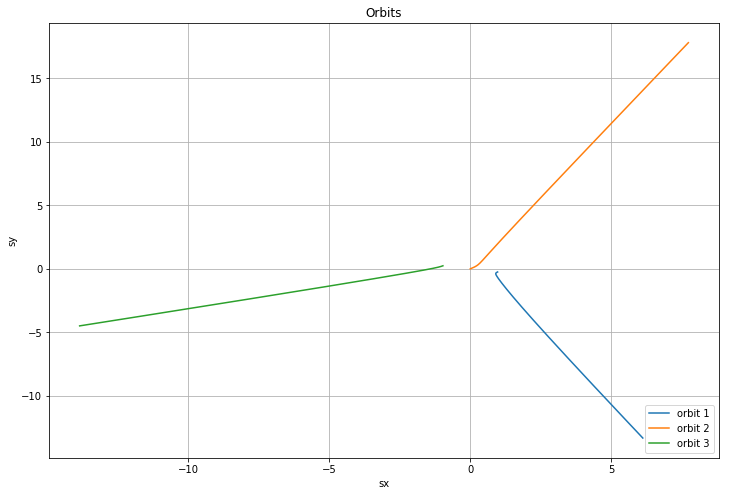

(1001,) (1001,)


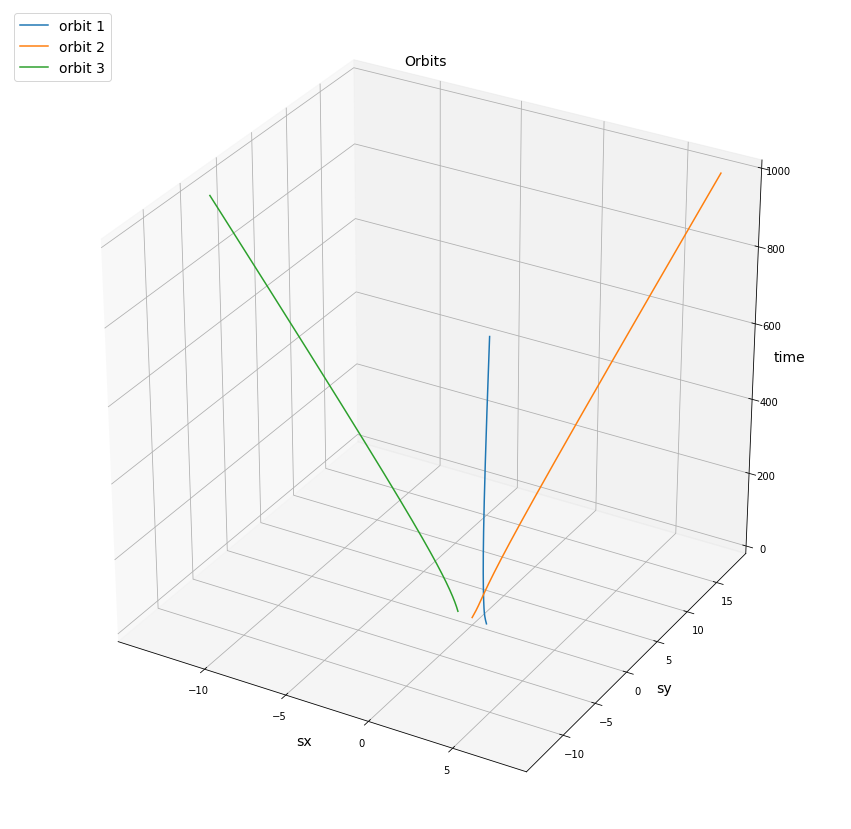

In [86]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

#Define initial position vectors
r0_1=[0.97000436,-0.24308753] 
r0_2=[0.,0.] 
r0_3=[-0.97000436,0.24308753] 

#Convert pos vectors to arrays
r0_1=np.array(r0_1,dtype="float64")
r0_2=np.array(r0_2,dtype="float64")
r0_3=np.array(r0_3,dtype="float64")

#Define initial velocities
v0_1=[-0.46620368,-0.43236573]
v0_2=[0.93240737,0.86473146]
v0_3=[-0.46620368,-0.43236573]


#Convert velocity vectors to arrays
v0_1=np.array(v0_1,dtype="float64")
v0_2=np.array(v0_2,dtype="float64")
v0_3=np.array(v0_3,dtype="float64")

#differential equations dw(x)/dx = f(w(x),x)

y=np.zeros(12) # intialise parameter array as y=[r1,r2,r3,v1,v2,v3]

def ThreeBodyEquations(y,x):
    r1=y[:2]
    r2=y[2:4]
    r3=y[4:6]
    v1=y[6:8]
    v2=y[8:10]
    v3=y[10:12]

    
    dv1bydt=-(r2-r1)/np.linalg.norm((r2-r1)**3)-(r3-r1)/np.linalg.norm((r3-r1)**3)
    dv2bydt=-(r1-r2)/np.linalg.norm((r1-r2)**3)-(r3-r2)/np.linalg.norm((r3-r2)**3)
    dv3bydt=-(r1-r3)/np.linalg.norm((r1-r3)**3)-(r2-r3)/np.linalg.norm((r2-r3)**3)
    
    dr1bydt=v1
    dr2bydt=v2
    dr3bydt=v3    
    
    r_derivs = np.concatenate((dr1bydt,dr2bydt,dr3bydt))
    v_derivs = np.concatenate((dv1bydt,dv2bydt,dv3bydt))
    derivs = np.concatenate((r_derivs,v_derivs)) 
    return derivs # gives array with time derivatives of [r1,r2,r3,v1,v2,v3]


#define parameters
h = 0.01 #time step
n = 1000 #total time steps

y0=np.array([r0_1,r0_2,r0_3,v0_1,v0_2,v0_3]) #Initial parameters
y0=y0.flatten() #Flatten to make 1D array
x0 = 0

#Numerical integration
#rk4(y0, x0, ThreeBodyEquations, h, n) 
#gives tuple of array[w[0],w[1],w[2],....,w[n] every time step n, where w=array(r1,r2,r3,v1,v2,v3)
#and array[x[0],x[1],x[2],....,x[n]] the time parameter for dw(x)/dx = f(w(x),x)


r1x=rk4(y0, x0, ThreeBodyEquations, h, n)[0][:,0]
r1y=rk4(y0, x0, ThreeBodyEquations, h, n)[0][:,1]
r2x=rk4(y0, x0, ThreeBodyEquations, h, n)[0][:,2]
r2y=rk4(y0, x0, ThreeBodyEquations, h, n)[0][:,3]
r3x=rk4(y0, x0, ThreeBodyEquations, h, n)[0][:,4]
r3y=rk4(y0, x0, ThreeBodyEquations, h, n)[0][:,5]

#Plot    
plt.figure(figsize = (12, 8))
plt.plot(r1x,r1y, label = 'orbit 1')
plt.plot(r2x,r2y, label = 'orbit 2')
plt.plot(r3x,r3y, label = 'orbit 3')
plt.title('Orbits')
plt.xlabel('sx')
plt.ylabel('sy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

#Create 3D figure
fig=plt.figure(figsize=(15,15))#Create 3D axes
t=np.arange(0,n+1,1)
ax=fig.add_subplot(111,projection="3d")#Plot the orbits
ax.plot(r1x,r1y,t,label = 'orbit 1')
ax.plot(r2x,r2y,t,label = 'orbit 2')
ax.plot(r3x,r3y,t,label = 'orbit 3')
ax.set_xlabel("sx",fontsize=14)
ax.set_ylabel("sy",fontsize=14)
ax.set_zlabel("time",fontsize=14)
ax.set_title("Orbits",fontsize=14)
ax.legend(loc="upper left",fontsize=14)
plt.show()


# Meissel-Burrau problem

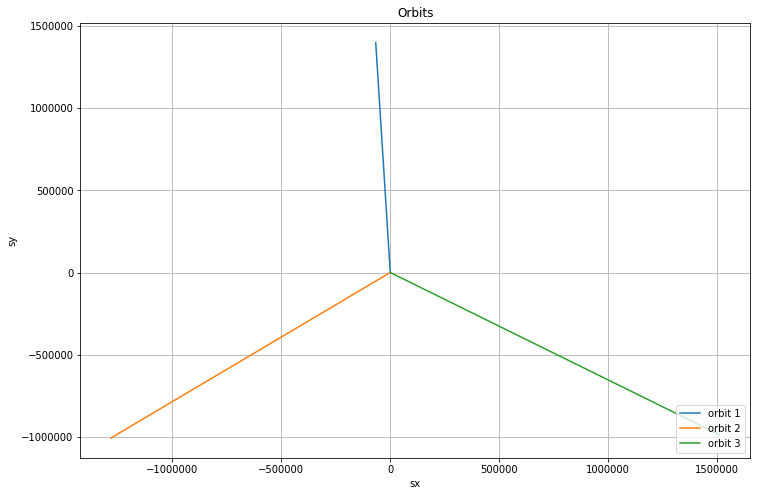

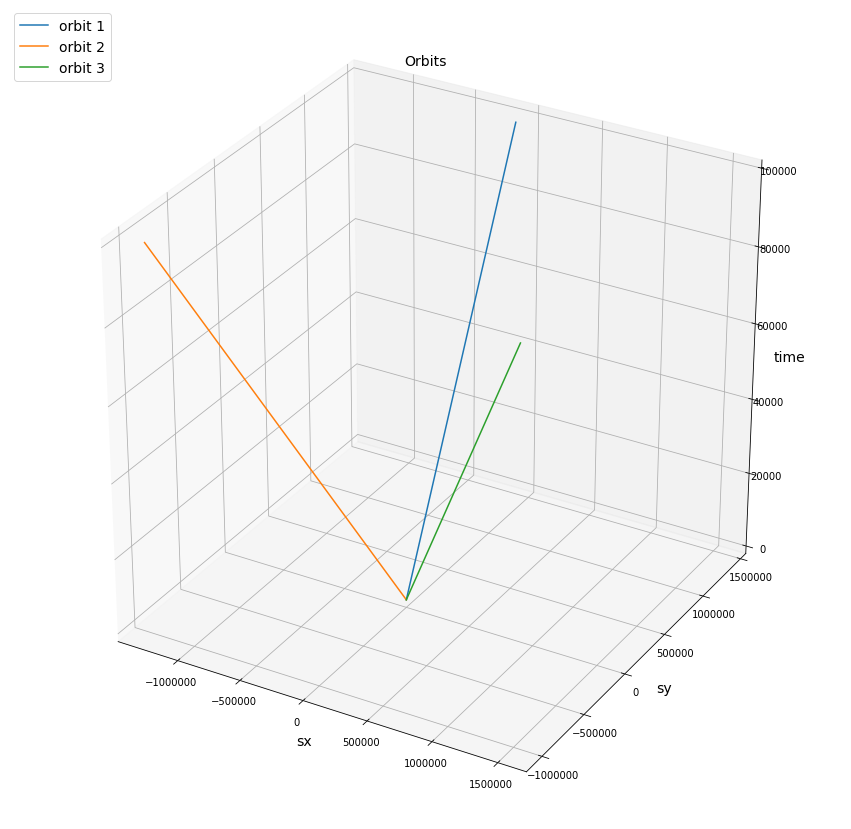

In [89]:
#set parameters
#masses
m1=5
m2=4
m3=3

#position the masses, where m2 is placed in origin
r1=[1.8,5.57] 
r2=[0.,0.] 
r3=[5.,0.] 

#Convert pos vectors to arrays
r1=np.array(r1,dtype="float64")
r2=np.array(r2,dtype="float64")
r3=np.array(r3,dtype="float64")

#caclulate centre of mass
r_com=(m1*r1+m2*r2+m3*r3)/(m1+m2+m3)

#translate system to centre of mass in origin
r0_1=[1.8,5.57] - r_com
r0_2=[0.,0.] - r_com
r0_3=[5.,0.] -r_com

#initial velocities
v0_1=[0,0]
v0_2=[0,0]
v0_3=[0,0]

#Convert velocity vectors to arrays
v0_1=np.array(v0_1,dtype="float64")
v0_2=np.array(v0_2,dtype="float64")
v0_3=np.array(v0_3,dtype="float64")

#define equations of motion
y=np.zeros(12) # intialise parameter array as w=[r1,r2,r3,v1,v2,v3]

def ThreeBodyEquations(y,x):
        
    r1=y[:2]
    r2=y[2:4]
    r3=y[4:6]
    v1=y[6:8]
    v2=y[8:10]
    v3=y[10:12]
    m1=5
    m2=4
    m3=3

    
    dv1bydt=-m2*(r2-r1)/np.linalg.norm((r2-r1)**3)-m3*(r3-r1)/np.linalg.norm((r3-r1)**3)
    dv2bydt=-m1*(r1-r2)/np.linalg.norm((r1-r2)**3)-m2*(r3-r2)/np.linalg.norm((r3-r2)**3)
    dv3bydt=-m1*(r1-r3)/np.linalg.norm((r1-r3)**3)-m2*(r2-r3)/np.linalg.norm((r2-r3)**3)
    
    dr1bydt=v1
    dr2bydt=v2
    dr3bydt=v3    
    
    r_derivs = np.concatenate((dr1bydt,dr2bydt,dr3bydt))
    v_derivs = np.concatenate((dv1bydt,dv2bydt,dv3bydt))
    derivs = np.concatenate((r_derivs,v_derivs)) 
    return derivs # gives array with time derivatives of [r1,r2,r3,v1,v2,v3]
    
#define parameters
h = 10 #time step
n = 100000 #total time steps

y0=np.array([r0_1,r0_2,r0_3,v0_1,v0_2,v0_3]) #Initial parameters
y0=y0.flatten() #Flatten to make 1D array
x0 = 0

#Numerical integration
#rk4(y0, x0, ThreeBodyEquations, h, n) 
#gives tuple of array[w[0],w[1],w[2],....,w[n] every time step n, where w=array(r1,r2,r3,v1,v2,v3)
#and array[x[0],x[1],x[2],....,x[n]] the time parameter for dw(x)/dx = f(w(x),x)


r1x=rk4(y0, x0, ThreeBodyEquations, h, n)[0][:,0]
r1y=rk4(y0, x0, ThreeBodyEquations, h, n)[0][:,1]
r2x=rk4(y0, x0, ThreeBodyEquations, h, n)[0][:,2]
r2y=rk4(y0, x0, ThreeBodyEquations, h, n)[0][:,3]
r3x=rk4(y0, x0, ThreeBodyEquations, h, n)[0][:,4]
r3y=rk4(y0, x0, ThreeBodyEquations, h, n)[0][:,5]

#Plot    
plt.figure(figsize = (12, 8))
plt.plot(r1x,r1y, label = 'orbit 1')
plt.plot(r2x,r2y, label = 'orbit 2')
plt.plot(r3x,r3y, label = 'orbit 3')
plt.title('Orbits')
plt.xlabel('sx')
plt.ylabel('sy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

#Create 3D figure
fig=plt.figure(figsize=(15,15))#Create 3D axes
t=np.arange(0,n+1,1)
ax=fig.add_subplot(111,projection="3d")#Plot the orbits
ax.plot(r1x,r1y,t,label = 'orbit 1')
ax.plot(r2x,r2y,t,label = 'orbit 2')
ax.plot(r3x,r3y,t,label = 'orbit 3')
ax.set_xlabel("sx",fontsize=14)
ax.set_ylabel("sy",fontsize=14)
ax.set_zlabel("time",fontsize=14)
ax.set_title("Orbits",fontsize=14)
ax.legend(loc="upper left",fontsize=14)
plt.show()